# Face Emotions analysis on Interview Videos

## This face emotion recognition project helps to identify facial emotions by extracting frames from video interviews and then analyzing them with the DeepFace library, displaying the emotions in the extracted frames.

In [ ]:
pip install deepface

In [ ]:
import cv2
import os

# Function to extract frames
def extract_frames(video_path, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    frame_count = 0

    while True:
        success, frame = video_capture.read()
        if not success:
            break

        # Save the current frame
        frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        frame_count += 1

    video_capture.release()
    print(f"{frame_count} frames extracted and saved in '{output_folder}'.")

# Example usage
video_file = "/content/SHIVANSHU.mp4"  # Replace with the path to your video
output_directory = "/content/frames"      # Replace with your desired folder name

extract_frames(video_file, output_directory)


2369 frames extracted and saved in '/content/frames'.


# Updated code selecting random images from the folder

In [ ]:
import random
from deepface import DeepFace
import cv2
import os
import matplotlib.pyplot as plt

# Directory containing frames
frames_dir = '/content/frames'
face_emotions = []
files_names = []

# Ensure the directory exists
if not os.path.exists(frames_dir):
    print(f"Directory not found: {frames_dir}")
else:
    # Get all files in the directory
    files = [f for f in os.listdir(frames_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

    # Randomly select 20 files
    if len(files) < 230:
        print(f"Not enough files in the directory. Found {len(files)} files.")
    else:
        random_files = random.sample(files, 230)

        # Iterate over the selected files
        for file_name in random_files:
            file_path = os.path.join(frames_dir, file_name)  # Construct the full file path

            # Read the image
            img = cv2.imread(file_path)

            # Check if the image was successfully read
            if img is None:
                print(f"Could not read image: {file_path}")
                continue

            # Optional: Display the image (Uncomment if needed)
            # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            # plt.title(f"Processing {file_name}")
            # plt.show()

            # Analyze emotions
            try:
                result = DeepFace.analyze(img, actions=['emotion'])
                face_emotions.append(result)
                print(f"Analysis for {file_name}: {result}")
                files_names.append(file_name)
            except Exception as e:
                print(f"Error analyzing {file_path}: {e}")
                # files_names.append(file_name)

# Optional: Print all collected emotions
print("Collected face emotions:", face_emotions)

## Converting into dataframe


In [ ]:
import pandas as pd

# List to store all emotion data
emotion_data = []
face_reaction=[]

# Iterate through all results in face_emotions
for i in range((len(face_emotions))):
    # Print face confidence and emotions
    print(face_emotions[i][0]['face_confidence'], face_emotions[i][0]['emotion'])

    # Append the emotion dictionary to the list
    emotion_data.append(face_emotions[i][0]['emotion'])
    face_reaction.append(face_emotions[i][0]['face_confidence'])

# Create a single DataFrame from the collected data
data = pd.DataFrame(emotion_data)

# Display the DataFrame
print(data)

In [ ]:
data['file_name'] = files_names
data['Face_confidence'] = face_reaction
data.head()

In [ ]:
import os

In [ ]:
# os.listdir('/content/frames')

In [ ]:
files = []
for i in os.listdir('/content/frames'):
  print(f'/content/frames{i}')
  files.append(f'/content/frames/{i}')


/content/framesframe_0376.jpg
/content/framesframe_0030.jpg
/content/framesframe_0282.jpg
/content/framesframe_0219.jpg
/content/framesframe_0001.jpg
/content/framesframe_0420.jpg
/content/framesframe_0526.jpg
/content/framesframe_0257.jpg
/content/framesframe_0580.jpg
/content/framesframe_0683.jpg
/content/framesframe_0403.jpg
/content/framesframe_0678.jpg
/content/framesframe_0253.jpg
/content/framesframe_0065.jpg
/content/framesframe_0175.jpg
/content/framesframe_0634.jpg
/content/framesframe_0400.jpg
/content/framesframe_0732.jpg
/content/framesframe_0661.jpg
/content/framesframe_0084.jpg
/content/framesframe_0690.jpg
/content/framesframe_0545.jpg
/content/framesframe_0665.jpg
/content/framesframe_0128.jpg
/content/framesframe_0239.jpg
/content/framesframe_0191.jpg
/content/framesframe_0380.jpg
/content/framesframe_0100.jpg
/content/framesframe_0402.jpg
/content/framesframe_0165.jpg
/content/framesframe_0118.jpg
/content/framesframe_0509.jpg
/content/framesframe_0077.jpg
/content/f

In [ ]:
project_f = files[0:300]

In [ ]:
project_f[0:10]

['/content/frames/frame_0376.jpg',
 '/content/frames/frame_0030.jpg',
 '/content/frames/frame_0282.jpg',
 '/content/frames/frame_0219.jpg',
 '/content/frames/frame_0001.jpg',
 '/content/frames/frame_0420.jpg',
 '/content/frames/frame_0526.jpg',
 '/content/frames/frame_0257.jpg',
 '/content/frames/frame_0580.jpg',
 '/content/frames/frame_0683.jpg']

In [ ]:
img = cv2.imread('/content/frames/frame_0376.jpg')

In [ ]:
image = cv2.imread(project_f[0])

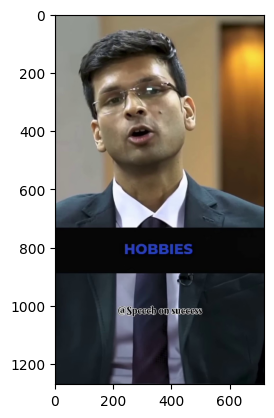

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


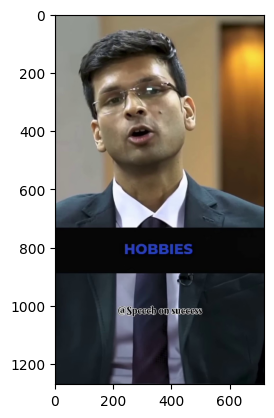

[{'emotion': {'angry': 4.5699389232675344e-12, 'disgust': 5.8315716197105605e-18, 'fear': 2.4053761205067303e-07, 'happy': 0.8157641626894474, 'sad': 4.747738842070248e-05, 'surprise': 3.940114456923993e-07, 'neutral': 99.18419122695923}, 'dominant_emotion': 'neutral', 'region': {'x': 81, 'y': 124, 'w': 385, 'h': 385, 'left_eye': (283, 450), 'right_eye': (251, 351)}, 'face_confidence': 0.92}]


In [ ]:
# from deepface import DeepFace
# import cv2
# import matplotlib.pyplot as plt

# # Read image
# img = cv2.imread('/content/Leonardo_Phoenix_a_professional_young_Indian_man_in_his_midtwe_0.jpg')

# Display image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Analyze emotions
result = DeepFace.analyze(img, actions=['emotion'])

# Print result
print(result)

In [ ]:
project_f[25]

'/content/frames/frame_0609.jpg'

In [ ]:
from deepface import DeepFace
import cv2
import os
import matplotlib.pyplot as plt

# Directory containing frames
# frames_dir = '/content/frames'
face_emotions = []


project_f = files[0:10]
# Iterate over each file in the directory
# for file_name in os.listdir(frames_dir):
#     file_path = os.path.join(frames_dir, file_name)  # Construct the full file path

for file_path in project_f:

    # Read the image
    img = cv2.imread(file_path)

    # Check if the image was successfully read
    if img is None:
        print(f"Could not read image: {file_path}")
        continue

    # Optional: Display the image
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.show()

    # Analyze emotions
    try:
      # for i in range(len(project_f)):
      result = DeepFace.analyze(img, actions=['emotion'])
      face_emotions.append(result['face_confidence'],result['emotion'])
      print(result)  # Print or store the result as needed
    except Exception as e:
      print(f"Error analyzing {file_path}: {e}")


Error analyzing /content/frames/frame_0376.jpg: list indices must be integers or slices, not str
Error analyzing /content/frames/frame_0030.jpg: list indices must be integers or slices, not str
Error analyzing /content/frames/frame_0282.jpg: list indices must be integers or slices, not str
Error analyzing /content/frames/frame_0219.jpg: list indices must be integers or slices, not str
Error analyzing /content/frames/frame_0001.jpg: list indices must be integers or slices, not str
Error analyzing /content/frames/frame_0420.jpg: list indices must be integers or slices, not str
Error analyzing /content/frames/frame_0526.jpg: list indices must be integers or slices, not str
Error analyzing /content/frames/frame_0257.jpg: list indices must be integers or slices, not str
Error analyzing /content/frames/frame_0580.jpg: list indices must be integers or slices, not str
Error analyzing /content/frames/frame_0683.jpg: list indices must be integers or slices, not str


In [ ]:
face_emotions

[]

In [ ]:
# from deepface import DeepFace
# import cv2
# import os
# import matplotlib.pyplot as plt

# # Directory containing frames
# # frames_dir = '/content/frames'
# face_emotions = []


# project_f = files[0:10]
# # Iterate over each file in the directory
# # for file_name in os.listdir(frames_dir):
# #     file_path = os.path.join(frames_dir, file_name)  # Construct the full file path

# for file_path in project_f:

#     # Read the image
#     img = cv2.imread(file_path)

#     # Check if the image was successfully read
#     if img is None:
#         print(f"Could not read image: {file_path}")
#         continue

#     for i in range(len(project_f)):
#       pass

#       try:
#           result = DeepFace.analyze(img, actions=['emotion'])
#           print(result[i])
#       except Exception as e:
#           print(f"Error analyzing {file_path}: {e}")


In [ ]:
# from deepface import DeepFace
# import cv2
# import matplotlib.pyplot as plt
# face_emotions = []

# for i in os.listdir('/content/frames'):
#   # print(f'/content/frames{i}')
#   img = cv2.imread(f'/content/frames{i}')

#   # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#   # plt.show()




#   # # Analyze emotions
#   result = DeepFace.analyze(img, actions=['emotion'])

#   # # Print result
#   # print(result)



## Working code
#### it is the code that is detecting the face emotions from the extracted frames of the images then store in the list

In [ ]:
# from deepface import DeepFace
# import cv2
# import os
# import matplotlib.pyplot as plt

# # Directory containing frames
# frames_dir = '/content/frames'
# face_emotions = []

# # Iterate over each file in the directory
# for file_name in os.listdir(frames_dir):
#     file_path = os.path.join(frames_dir, file_name)  # Construct the full file path

#     # Read the image
#     img = cv2.imread(file_path)

#     # Check if the image was successfully read
#     if img is None:
#         print(f"Could not read image: {file_path}")
#         continue

#     # Optional: Display the image
#     # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     # plt.show()

#     # Analyze emotions
#     try:
#         result = DeepFace.analyze(img[0:10], actions=['emotion'])
#         face_emotions.append(result)
#         print(result)  # Print or store the result as needed
#     except Exception as e:
#         print(f"Error analyzing {file_path}: {e}")


# Updated code detecting top 20 images from the folder

In [ ]:
from deepface import DeepFace
import cv2
import os
import matplotlib.pyplot as plt

# Directory containing frames
frames_dir = '/content/frames'
face_emotions = []

# Ensure the directory exists
if not os.path.exists(frames_dir):
    print(f"Directory not found: {frames_dir}")
else:
    # Get all files in the directory and sort them (optional)
    files = sorted(os.listdir(frames_dir))[:20]  # Only take the first 20 files

    # Iterate over each file
    for file_name in files:
        file_path = os.path.join(frames_dir, file_name)  # Construct the full file path

        # Skip non-image files
        if not file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Skipping non-image file: {file_name}")
            continue

        # Read the image
        img = cv2.imread(file_path)

        # Check if the image was successfully read
        if img is None:
            print(f"Could not read image: {file_path}")
            continue

        # Optional: Display the image (Uncomment if needed)
        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # plt.title(f"Processing {file_name}")
        # plt.show()

        # Analyze emotions
        try:
            result = DeepFace.analyze(img, actions=['emotion'])
            face_emotions.append(result)
            print(f"Analysis for {file_name}: {result}")
        except Exception as e:
            print(f"Error analyzing {file_path}: {e}")

# Optional: Print all collected emotions
print("Collected face emotions:", face_emotions)


Analysis for frame_0000.jpg: [{'emotion': {'angry': 3.066117875277996, 'disgust': 0.0015413805158459581, 'fear': 13.548421859741211, 'happy': 5.057389661669731, 'sad': 68.57702732086182, 'surprise': 0.05661463364958763, 'neutral': 9.692893922328949}, 'dominant_emotion': 'sad', 'region': {'x': 174, 'y': 111, 'w': 392, 'h': 392, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.9}]
Analysis for frame_0001.jpg: [{'emotion': {'angry': 1.4378690593730425e-05, 'disgust': 8.872323709052665e-09, 'fear': 0.0039351445593638346, 'happy': 0.051215419080108404, 'sad': 0.7343122735619545, 'surprise': 1.4590050945173516e-06, 'neutral': 99.210524559021}, 'dominant_emotion': 'neutral', 'region': {'x': 175, 'y': 110, 'w': 392, 'h': 392, 'left_eye': (322, 403), 'right_eye': (320, 256)}, 'face_confidence': 0.9}]
Analysis for frame_0002.jpg: [{'emotion': {'angry': 2.807922346551289e-19, 'disgust': 2.775761939787659e-25, 'fear': 0.0018930617443402298, 'happy': 1.7755010794928694e-07, 'sad': 3.20408

# Main code
- it is the main code

# Updated code selecting random 20 images from the folder

In [ ]:
import random
from deepface import DeepFace
import cv2
import os
import matplotlib.pyplot as plt

# Directory containing frames
frames_dir = '/content/frames'
face_emotions = []
files_names = []

# Ensure the directory exists
if not os.path.exists(frames_dir):
    print(f"Directory not found: {frames_dir}")
else:
    # Get all files in the directory
    files = [f for f in os.listdir(frames_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

    # Randomly select 20 files
    if len(files) < 230:
        print(f"Not enough files in the directory. Found {len(files)} files.")
    else:
        random_files = random.sample(files, 230)

        # Iterate over the selected files
        for file_name in random_files:
            file_path = os.path.join(frames_dir, file_name)  # Construct the full file path

            # Read the image
            img = cv2.imread(file_path)

            # Check if the image was successfully read
            if img is None:
                print(f"Could not read image: {file_path}")
                continue

            # Optional: Display the image (Uncomment if needed)
            # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            # plt.title(f"Processing {file_name}")
            # plt.show()

            # Analyze emotions
            try:
                result = DeepFace.analyze(img, actions=['emotion'])
                face_emotions.append(result)
                print(f"Analysis for {file_name}: {result}")
                files_names.append(file_name)
            except Exception as e:
                print(f"Error analyzing {file_path}: {e}")
                # files_names.append(file_name)

# Optional: Print all collected emotions
print("Collected face emotions:", face_emotions)


24-12-09 07:45:17 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 84.0MB/s]


Analysis for frame_1123.jpg: [{'emotion': {'angry': 1.9642970977071408, 'disgust': 0.020763015053080463, 'fear': 57.59628324552974, 'happy': 1.6344699922835837, 'sad': 22.52273589101602, 'surprise': 0.135743334074368, 'neutral': 16.125702425753783}, 'dominant_emotion': 'fear', 'region': {'x': 182, 'y': 407, 'w': 331, 'h': 331, 'left_eye': (403, 544), 'right_eye': (269, 556)}, 'face_confidence': 0.89}]
Analysis for frame_1769.jpg: [{'emotion': {'angry': 1.9976748153567314, 'disgust': 3.3184147696374566e-05, 'fear': 0.5569330416619778, 'happy': 0.0135901864268817, 'sad': 67.98020601272583, 'surprise': 2.8370618565531913e-05, 'neutral': 29.451534152030945}, 'dominant_emotion': 'sad', 'region': {'x': 174, 'y': 424, 'w': 342, 'h': 342, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.9}]
Analysis for frame_2241.jpg: [{'emotion': {'angry': 0.7071939762681723, 'disgust': 1.8993047135040797e-06, 'fear': 1.4926242642104626, 'happy': 0.0004588804131344659, 'sad': 39.791908860206604, 's

In [ ]:
# files_names

In [ ]:
face_emotions[0]

[{'emotion': {'angry': 0.00014929551070963498,
   'disgust': 7.437982218682683e-18,
   'fear': 0.7709387224167585,
   'happy': 27.55844295024872,
   'sad': 0.4611922428011894,
   'surprise': 1.163096260279417,
   'neutral': 70.04618644714355},
  'dominant_emotion': 'neutral',
  'region': {'x': 217,
   'y': 249,
   'w': 173,
   'h': 173,
   'left_eye': (336, 322),
   'right_eye': (293, 381)},
  'face_confidence': 0.93}]

In [ ]:
face_emotions[5][0]['face_confidence']

0.91

In [ ]:
face_emotions[0][0]['emotion']

{'angry': 7.904930412769318,
 'disgust': 0.001812292066460941,
 'fear': 91.11409783363342,
 'happy': 0.00042541901166259777,
 'sad': 0.7975678890943527,
 'surprise': 0.01727049093460664,
 'neutral': 0.16389427473768592}

In [ ]:
# results[0]['face_confidence']

In [ ]:
len(face_emotions)

37

In [ ]:
import pandas as pd
# data = pd.DataFrame(face_emotions)

In [ ]:
face_emotions[0][0]['emotion']

{'angry': 7.904930412769318,
 'disgust': 0.001812292066460941,
 'fear': 91.11409783363342,
 'happy': 0.00042541901166259777,
 'sad': 0.7975678890943527,
 'surprise': 0.01727049093460664,
 'neutral': 0.16389427473768592}

In [ ]:
# data = pd.DataFrame([face_emotions[0][0]['emotion']])

In [ ]:
# for i in range((len(face_emotions)-1)):
#   print(face_emotions[i][0]['face_confidence'],face_emotions[i][0]['emotion'])
#   data = pd.DataFrame([face_emotions[i][0]['emotion']])

In [ ]:
face_emotions[0][0]

{'emotion': {'angry': 7.904930412769318,
  'disgust': 0.001812292066460941,
  'fear': 91.11409783363342,
  'happy': 0.00042541901166259777,
  'sad': 0.7975678890943527,
  'surprise': 0.01727049093460664,
  'neutral': 0.16389427473768592},
 'dominant_emotion': 'fear',
 'region': {'x': 94,
  'y': 119,
  'w': 365,
  'h': 365,
  'left_eye': (257, 337),
  'right_eye': (287, 399)},
 'face_confidence': 0.93}

In [ ]:
import pandas as pd

# List to store all emotion data
emotion_data = []
face_reaction=[]

# Iterate through all results in face_emotions
for i in range((len(face_emotions))):
    # Print face confidence and emotions
    print(face_emotions[i][0]['face_confidence'], face_emotions[i][0]['emotion'])

    # Append the emotion dictionary to the list
    emotion_data.append(face_emotions[i][0]['emotion'])
    face_reaction.append(face_emotions[i][0]['face_confidence'])

# Create a single DataFrame from the collected data
data = pd.DataFrame(emotion_data)

# Display the DataFrame
print(data)


0.89 {'angry': 1.9642970977071408, 'disgust': 0.020763015053080463, 'fear': 57.59628324552974, 'happy': 1.6344699922835837, 'sad': 22.52273589101602, 'surprise': 0.135743334074368, 'neutral': 16.125702425753783}
0.9 {'angry': 1.9976748153567314, 'disgust': 3.3184147696374566e-05, 'fear': 0.5569330416619778, 'happy': 0.0135901864268817, 'sad': 67.98020601272583, 'surprise': 2.8370618565531913e-05, 'neutral': 29.451534152030945}
0.9 {'angry': 0.7071939762681723, 'disgust': 1.8993047135040797e-06, 'fear': 1.4926242642104626, 'happy': 0.0004588804131344659, 'sad': 39.791908860206604, 'surprise': 2.0517735777048074e-05, 'neutral': 58.00779461860657}
0.9 {'angry': 0.45609641820192337, 'disgust': 4.017213086626725e-05, 'fear': 0.22084005177021027, 'happy': 0.13454511063173413, 'sad': 8.403324335813522, 'surprise': 0.000536763627678738, 'neutral': 90.7846212387085}
0.9 {'angry': 7.027009129524231, 'disgust': 0.0760148570407182, 'fear': 18.674257397651672, 'happy': 10.58296263217926, 'sad': 31.

In [ ]:
type(face_reaction[0])

numpy.float64

In [ ]:
files_names[0]

'frame_0492.jpg'

In [ ]:
len(files_names)

79

In [ ]:
data.shape

(78, 7)

In [ ]:
data.head(4)

,angry,disgust,fear,happy,sad,surprise,neutral
0,1.964297,0.020763,57.596283,1.634470,22.522736,0.135743,16.125702
1,1.997675,0.000033,0.556933,0.013590,67.980206,0.000028,29.451534
2,0.707194,0.000002,1.492624,0.000459,39.791909,0.000021,58.007795
3,0.456096,0.000040,0.220840,0.134545,8.403324,0.000537,90.784621


In [ ]:
data['file_name'] = files_names

,angry,disgust,fear,happy,sad,surprise,neutral,file_name
0,7.904930,1.812292e-03,91.114098,0.000425,0.797568,0.017270,0.163894,frame_0044.jpg
1,5.498828,1.243135e-01,89.922197,0.006892,2.658956,0.557025,1.231789,frame_0105.jpg
2,0.044550,4.308343e-11,0.094390,0.000155,4.330179,0.000242,95.530486,frame_0485.jpg
3,58.644730,2.411703e+00,27.633265,0.068445,1.167897,9.669379,0.404584,frame_0249.jpg
4,0.979878,2.500872e-12,0.028178,0.000006,1.143024,0.000415,97.848505,frame_0544.jpg


In [ ]:
data['Face_confidence'] = face_reaction

In [ ]:
data.head()

,angry,disgust,fear,happy,sad,surprise,neutral,file_name,Face_confidence
0,1.964297,0.020763,57.596283,1.634470,22.522736,0.135743,16.125702,frame_1123.jpg,0.89
1,1.997675,0.000033,0.556933,0.013590,67.980206,0.000028,29.451534,frame_1769.jpg,0.90
2,0.707194,0.000002,1.492624,0.000459,39.791909,0.000021,58.007795,frame_2241.jpg,0.90
3,0.456096,0.000040,0.220840,0.134545,8.403324,0.000537,90.784621,frame_0876.jpg,0.90
4,7.027009,0.076015,18.674257,10.582963,31.971467,0.288389,31.379905,frame_1184.jpg,0.90


In [ ]:
data.describe(include='all')

,angry,disgust,fear,happy,sad,surprise,neutral,file_name,Face_confidence
count,2.300000e+02,2.300000e+02,230.000000,2.300000e+02,230.000000,2.300000e+02,230.000000,230,230.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,frame_1123.jpg,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,1.487148e+01,1.158044e-02,13.311555,1.770003e+00,31.064447,4.275886e-02,38.928175,NaN,0.903609
std,1.510932e+01,3.391073e-02,13.021007,8.225542e+00,16.628441,1.135524e-01,23.670405,NaN,0.012487
min,5.522220e-11,6.351383e-26,0.005373,5.359046e-09,0.225794,7.066753e-10,1.296408,NaN,0.870000
25%,3.838939e+00,7.842173e-05,3.312472,4.134697e-02,18.842233,1.740996e-03,21.504163,NaN,0.890000
50%,9.210963e+00,7.090263e-04,9.332138,1.502568e-01,28.984650,6.640838e-03,33.762254,NaN,0.900000
75%,1.990262e+01,4.813522e-03,19.032148,5.066396e-01,42.779112,2.400264e-02,53.133419,NaN,0.910000


In [ ]:
(42+30+91)/3

54.333333333333336

In [ ]:
mean = []
for i in data['angry']:
  mean.append(i)

In [ ]:
print((sum(mean)/len(mean)))

11.393602244410285


In [ ]:
data.isnull().sum()

,0
angry,0
disgust,0
fear,0
happy,0
sad,0
surprise,0
neutral,0


In [ ]:
data.shape

(76, 7)

In [ ]:
type(face_emotions)

list

In [ ]:
# Extract face_confidence values, ignoring invalid entries
for i in range(len(face_emotions)):
  face_confidences = [
      item['face_confidence'] for item in face_emotions[i]
      if isinstance(item, dict) and 'face_confidence' in item
  ]

  # Print the result
print(face_confidences)

[0.92]


In [ ]:
print(face_confidences)

[0.92]


In [ ]:
print(face_emotions)

[[{'emotion': {'angry': 1.2748184669356122e-11, 'disgust': 1.0698552396650761e-24, 'fear': 0.006231636507436633, 'happy': 5.271556628716478e-10, 'sad': 0.0003379902636879706, 'surprise': 0.00018139255644200603, 'neutral': 99.99325275421143}, 'dominant_emotion': 'neutral', 'region': {'x': 205, 'y': 135, 'w': 364, 'h': 364, 'left_eye': (347, 339), 'right_eye': (340, 261)}, 'face_confidence': 0.91}], [{'emotion': {'angry': 0.1827253494411707, 'disgust': 0.00235367569985101, 'fear': 47.039493918418884, 'happy': 0.00035628065688797506, 'sad': 50.669217109680176, 'surprise': 0.0002770882247205009, 'neutral': 2.1055808290839195}, 'dominant_emotion': 'sad', 'region': {'x': 192, 'y': 141, 'w': 369, 'h': 369, 'left_eye': (344, 354), 'right_eye': (328, 409)}, 'face_confidence': 0.93}], [{'emotion': {'angry': 1.0797875933349133, 'disgust': 2.2879687477939115e-06, 'fear': 93.673574924469, 'happy': 2.467509432335646e-05, 'sad': 0.5871372297406197, 'surprise': 0.0034768869227264076, 'neutral': 4.6560

In [ ]:
!mkdir output

In [ ]:
# Data
data = [
    {'emotion': {'angry': 1.2748184669356122e-11, 'disgust': 1.0698552396650761e-24, 'fear': 0.006231636507436633, 'happy': 5.271556628716478e-10, 'sad': 0.0003379902636879706, 'surprise': 0.00018139255644200603, 'neutral': 99.99325275421143}, 'dominant_emotion': 'neutral', 'region': {'x': 205, 'y': 135, 'w': 364, 'h': 364, 'left_eye': (347, 339), 'right_eye': (340, 261)}, 'face_confidence': 0.91},
    {'emotion': {'angry': 0.1827253494411707, 'disgust': 0.00235367569985101, 'fear': 47.039493918418884, 'happy': 0.00035628065688797506, 'sad': 50.669217109680176, 'surprise': 0.0002770882247205009, 'neutral': 2.1055808290839195}, 'dominant_emotion': 'sad', 'region': {'x': 192, 'y': 141, 'w': 369, 'h': 369, 'left_eye': (344, 354), 'right_eye': (328, 409)}, 'face_confidence': 0.93},
    {'emotion': {'angry': 1.0797875933349133, 'disgust': 2.2879687477939115e-06, 'fear': 93.673574924469, 'happy': 2.467509432335646e-05, 'sad': 0.5871372297406197, 'surprise': 0.0034768869227264076, 'neutral': 4.656004533171654}, 'dominant_emotion': 'fear', 'region': {'x': 80, 'y': 101, 'w': 406, 'h': 406, 'left_eye': (258, 336), 'right_eye': (290, 398)}, 'face_confidence': 0.93}
    'Error analyzing /content/frames/frame_0254.jpg: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
  ]

# Extract face_confidence
face_confidences = [item['face_confidence'] for item in data]

# Print result
print(face_confidences)


[0.91, 0.93, 0.93]


In [ ]:
application=[]
for i in range(len(face_emotions)):
  face_emotions[i]['face_confidence']
  application.append(face_emotions[i]['face_confidence'])

TypeError: list indices must be integers or slices, not str

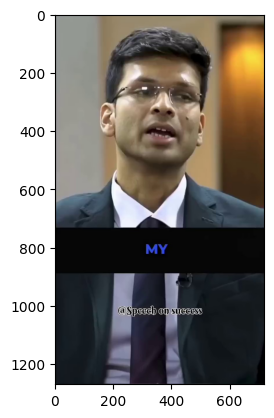

[{'emotion': {'angry': 3.066122718155384, 'disgust': 0.0015413790606544353, 'fear': 13.548396527767181, 'happy': 5.057401210069656, 'sad': 68.57702136039734, 'surprise': 0.05661470931954682, 'neutral': 9.692904353141785}, 'dominant_emotion': 'sad', 'region': {'x': 174, 'y': 111, 'w': 392, 'h': 392, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.9}]


In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

face_emotions = []
# Read image
img = cv2.imread('/content/frames/frame_0000.jpg')

# Display image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Analyze emotions
result = DeepFace.analyze(img, actions=['emotion'])

# Print result
print(result)

In [ ]:
result[0]['face_confidence']

0.9

In [ ]:
result[0]['emotion']

{'angry': 3.066122718155384,
 'disgust': 0.0015413790606544353,
 'fear': 13.548396527767181,
 'happy': 5.057401210069656,
 'sad': 68.57702136039734,
 'surprise': 0.05661470931954682,
 'neutral': 9.692904353141785}